<a href="https://colab.research.google.com/github/umleeho1/DataAnalysis/blob/main/data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [4]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/survey_results_public.csv'
raw_data = pd.read_csv(path)

raw_data.info()

Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8501 entries, 0 to 8500
Data columns (total 79 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ResponseId                      8501 non-null   int64  
 1   MainBranch                      8501 non-null   object 
 2   Employment                      8420 non-null   object 
 3   RemoteWork                      7104 non-null   object 
 4   CodingActivities                7103 non-null   object 
 5   EdLevel                         8413 non-null   object 
 6   LearnCode                       8413 non-null   object 
 7   LearnCodeOnline                 6101 non-null   object 
 8   LearnCodeCoursesCert            2840 non-null   object 
 9   YearsCode                       8390 non-null   object 
 10  YearsCodePro                    6294 non-null   object 
 11  DevType                         7294 non-null   object 
 12  OrgSize 

In [5]:
selected_columns = ["Age", "Country", "LanguageHaveWorkedWith", "LearnCode"]
revised_data = raw_data[selected_columns]

revised_data.head()

,Age,Country,LanguageHaveWorkedWith,LearnCode
0,NaN,NaN,NaN,NaN
1,NaN,Canada,JavaScript;TypeScript,NaN
2,25-34 years old,United Kingdom of Great Britain and Northern I...,C#;C++;HTML/CSS;JavaScript;Python,Books / Physical media;Friend or family member...
3,35-44 years old,Israel,C#;JavaScript;SQL;TypeScript,"Books / Physical media;School (i.e., Universit..."
4,25-34 years old,United States of America,C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript,"Other online resources (e.g., videos, blogs, f..."


In [6]:
#data 들이 ; 기준으로 나누어져있고 여러줄로 나누는 코드를 explode()를 통해 한 줄로 표현
exploded_learn_code = revised_data["LearnCode"].str.split(";").explode()
exploded_learn_code

0                                                     NaN
1                                                     NaN
2                                  Books / Physical media
2                                 Friend or family member
2       Other online resources (e.g., videos, blogs, f...
                              ...                        
8498                      Online Courses or Certification
8498                              Other (please specify):
8499    Other online resources (e.g., videos, blogs, f...
8499              School (i.e., University, College, etc)
8500              School (i.e., University, College, etc)
Name: LearnCode, Length: 27327, dtype: object

<Axes: ylabel='LearnCode'>

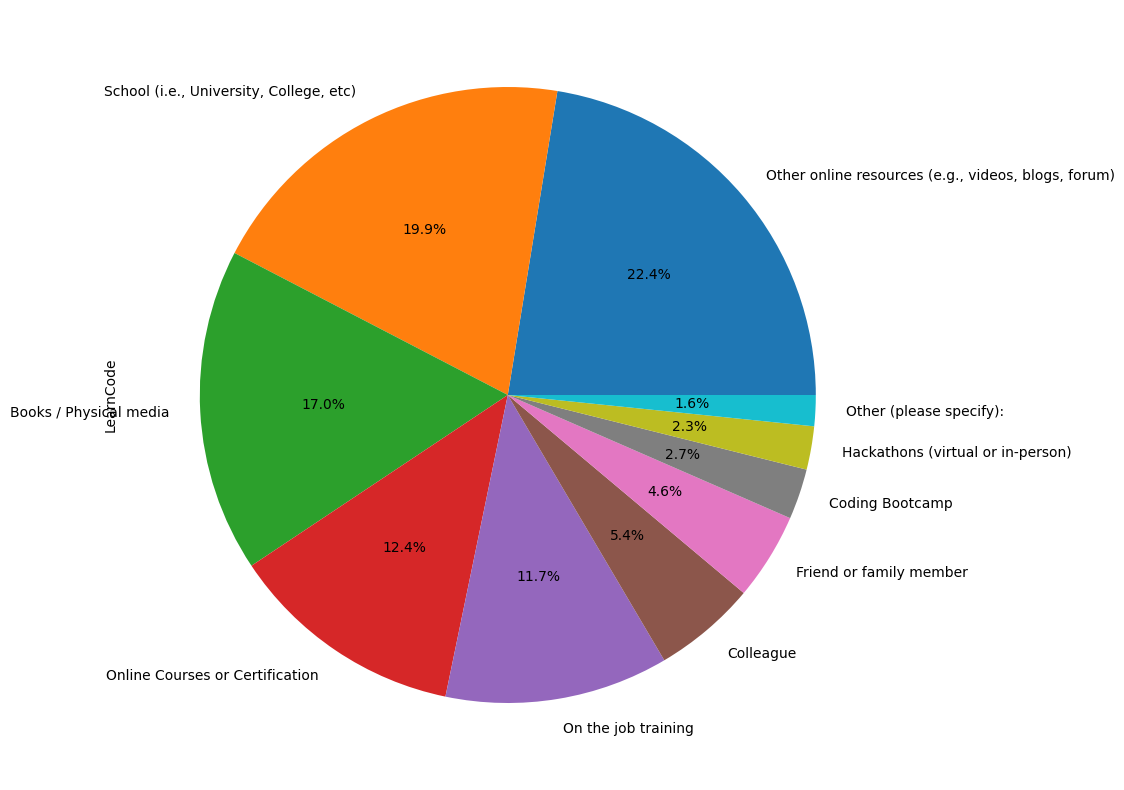

In [7]:
exploded_learn_code.groupby(exploded_learn_code).size().nlargest(10).plot.pie(figsize=(10,10), autopct='%1.1f%%')


In [8]:
exploded_learn_code_for_25_34 = revised_data[revised_data.Age == '25-34 years old']["LearnCode"].str.split(";").explode()
exploded_learn_code_for_25_34

2                                  Books / Physical media
2                                 Friend or family member
2       Other online resources (e.g., videos, blogs, f...
2                 School (i.e., University, College, etc)
4       Other online resources (e.g., videos, blogs, f...
                              ...                        
8497              School (i.e., University, College, etc)
8497                      Online Courses or Certification
8498                      Online Courses or Certification
8498                              Other (please specify):
8500              School (i.e., University, College, etc)
Name: LearnCode, Length: 12026, dtype: object

<Axes: ylabel='LearnCode'>

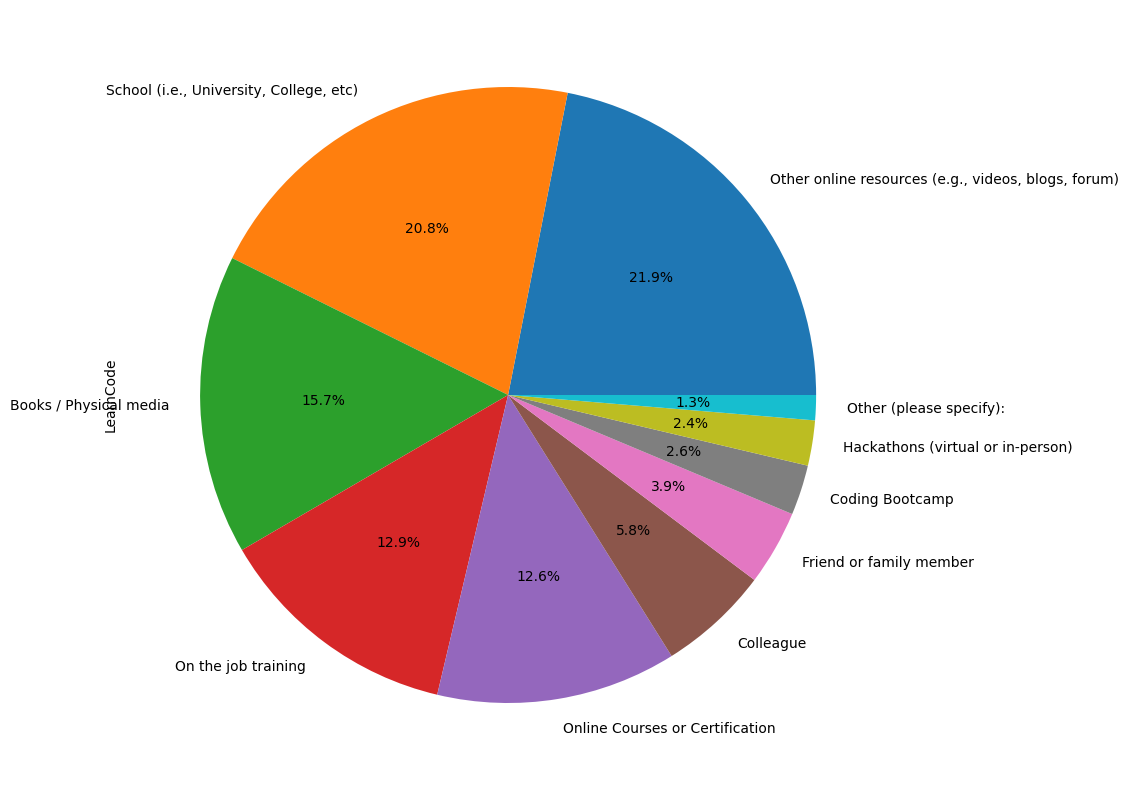

In [9]:
exploded_learn_code_for_25_34.groupby(exploded_learn_code_for_25_34).size().nlargest(10).plot.pie(figsize=(10,10), autopct='%1.1f%%')